In [2]:
# Import the relevant libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
#from brewer2mpl import qualitative

In [6]:
if not os.path.exists("../data/prep/500.csv"):
    print("Missing dataset file")
else:
    print("Success!")

Success!


In [7]:
df = pd.read_csv("../data/prep/500.csv")

In [8]:
print(df.shape)

(7374, 26)


In [9]:
df.isnull().any().any()

False

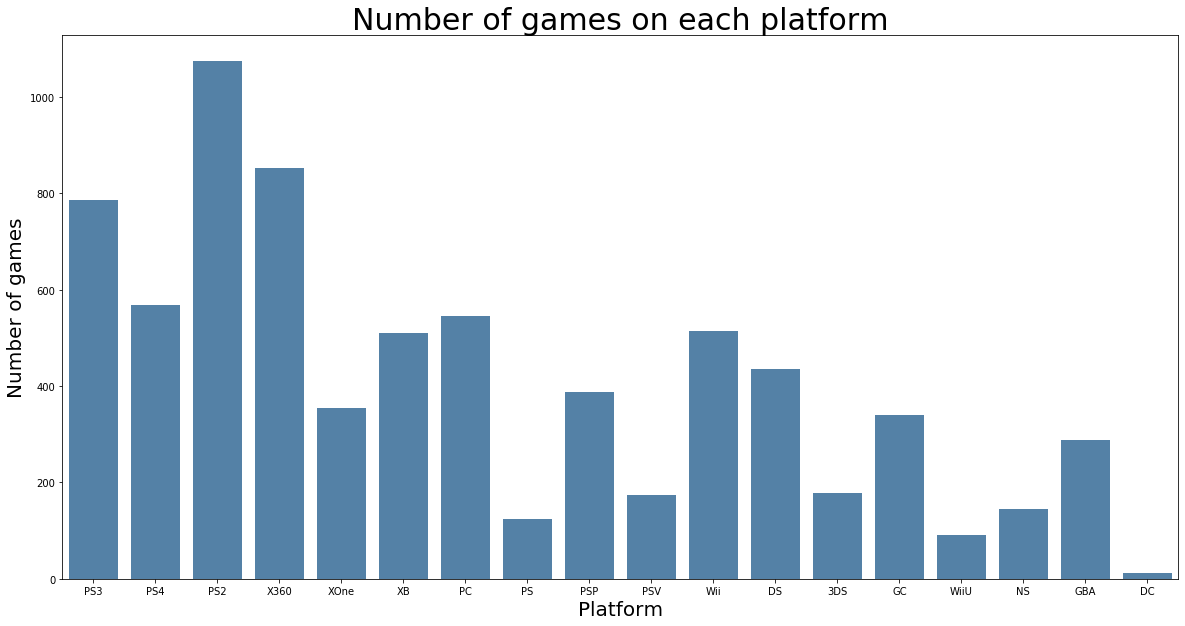

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(df['platform'],color='steelblue')
plt.title('Number of games on each platform',fontdict={'fontsize':30})
plt.xlabel('Platform',fontdict={'fontsize':20})
plt.ylabel('Number of games',fontdict={'fontsize':20})
plt.show()

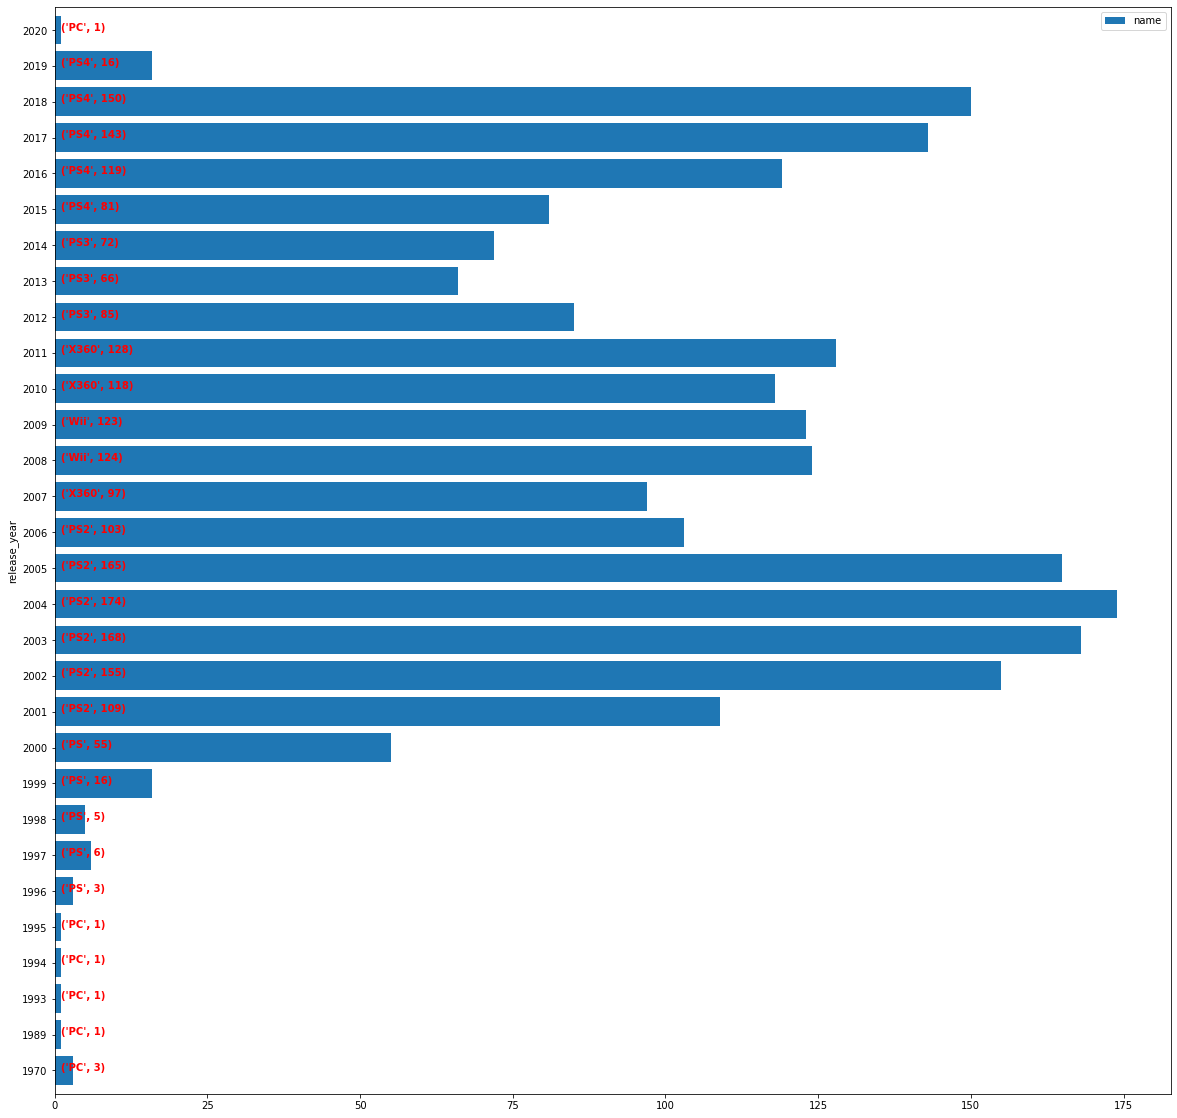

In [29]:
new=df.groupby(['release_year','platform'])['name'].count().reset_index()
#new.columns=[['release_year','platform','count']]
new=new.sort_values(by='name',ascending=False)
new=new.drop_duplicates(subset=['release_year'],keep='first')
new=new.sort_values(by='release_year')
new.set_index('release_year',inplace=True)
new.plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(20,20)
y=0
for i, p in enumerate(zip(new.platform, new['name'])):
    plt.text(s=p,x=1,y=i,fontweight='bold',color='red')
plt.show()

### The Console wars. The epic battles fought ( and still being fought) amongst the biggest and baddest players in the console gaming industry. This notebook will focus on the 7th Generation and the 8th Generation of the Console wars and the belligerents are as follows :

### 7th GENERATION : Playstation 3 vs XBOX360 vs Nintendo Wii

### 8th GENERATION : Playstation 4 vs XBOXONE vs Nintendo WiiU

### The aim is to run some visualisations on how some of the features in the dataset are correlated to one another as well as to provide some summary statistics and data analysis on the choice of genres and overall sales made by the different consoles to observe which one emerges with bragging rights.

In [13]:
df.platform.unique()

array(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'XB', 'PC', 'PS', 'PSP',
       'PSV', 'Wii', 'DS', '3DS', 'GC', 'WiiU', 'NS', 'GBA', 'DC'],
      dtype=object)

### Per the above, one can see that there are quite a few different platforms in our dataset. For the scope and purpose of this notebook, there are more platforms than required (as we want only the 7th and 8th Generational consoles). Therefore we have to undertake some selective trimming of the data which we will get to in due time.

## **7th GENERATION CONSOLE WAR**

## Tale of the tape : PS3 vs XBOX360 vs Wii
### Onto our first event of the evening, I'll provide some visualisations and summary statistics on the 7th Gen Console wars fought between the 3 main parties alluded to above. First, I will create a dataframe ("video7th") to contain only these 7th Gen consoles and then it's time to do some data poking and inspecting.

In [14]:
# Dataframe contain info only on the 7th Gen consoles
video7th = df[(df['platform'] == 'Wii') | (df['platform'] == 'PS3') | (df['platform'] == 'X360')]
video7th.shape

(2152, 26)

In [48]:
video7th=video7th.set_index('name')
video7th.to_csv('../data/analysis/platform7.csv')

## **GLOBAL SALES OVER THE YEARS**
### First let's look at these console's global sales over the years and see if we can identify any which left with bragging rights. To do so, I shall aggregate the data via a "groupby" call on the Year_of_Release and "Platform" and then sum the Global_Sales. For visualisation, I will plot stacked barplots and hopefully this will be intuitive enough

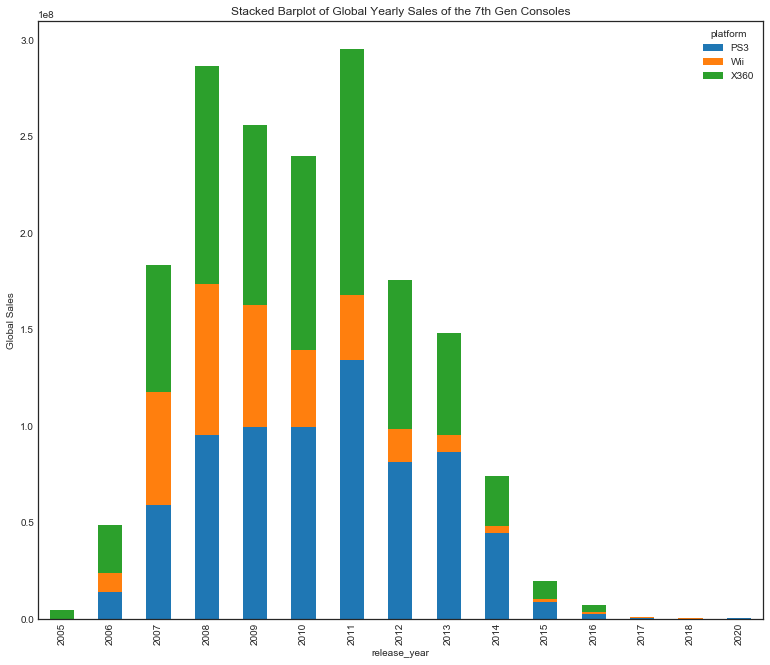

release_year  platform
2005          X360          4640000.0
2006          PS3          14210000.0
              Wii           9380000.0
              X360         25070000.0
2007          PS3          59120000.0
              Wii          58350000.0
              X360         65750000.0
2008          PS3          95390000.0
              Wii          78250000.0
              X360        113110000.0
2009          PS3          99350000.0
              Wii          63330000.0
              X360         93430000.0
2010          PS3          99650000.0
              Wii          39630000.0
              X360        100480000.0
2011          PS3         134180000.0
              Wii          33800000.0
              X360        127130000.0
2012          PS3          81150000.0
              Wii          17520000.0
              X360         76860000.0
2013          PS3          86520000.0
              Wii           8740000.0
              X360         53070000.0
2014          PS3          

In [15]:
yearlySales = video7th.groupby(['release_year','platform']).global_sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True,
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')
plt.show()
yearlySales

### First Impressions : Seems the PS3 sales went from strength to strength , XB360 sales (bar a dip in 2009) also generally increased while the Wii sales, which had a strong headstart in the early years of 2006 and 2007 had it's lead eroded by the other 2.

,Releases,Global Sales
platform,,
PS3,785,726510000.0
Wii,514,315350000.0
X360,853,698880000.0


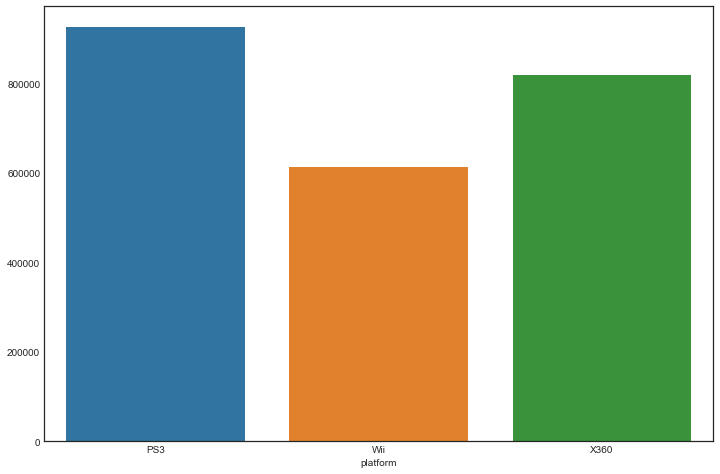

In [56]:
data = video7th.groupby('platform').count()['release_date']
data = pd.DataFrame(data)
data.columns = ['Releases']
data2 = video7th.groupby(['platform']).sum()['global_sales']
data2 = pd.DataFrame(data2.sort_values(ascending=False))

data2.columns = ['Global Sales']
final_data = pd.merge(left=data, right=data2, how='left', left_on='platform', right_on='platform')
plt.figure(figsize=(12,8))
y= final_data['Global Sales']/final_data['Releases']
plat=final_data.index
ax = sns.barplot(y = y , x = plat, data=final_data)
final_data

PS3 games get more sales on average than the other 3 platfroms. This may suggest that PS3 users are more inclined to buy games.

## **SALES AGGREGATED BY VIDEO GAME RATINGS**
### Here, I will take a look at the different video game ratings (i think its E : Everyone, M: Mature, T: Teens) and look at how many sales each of the 3 consoles made

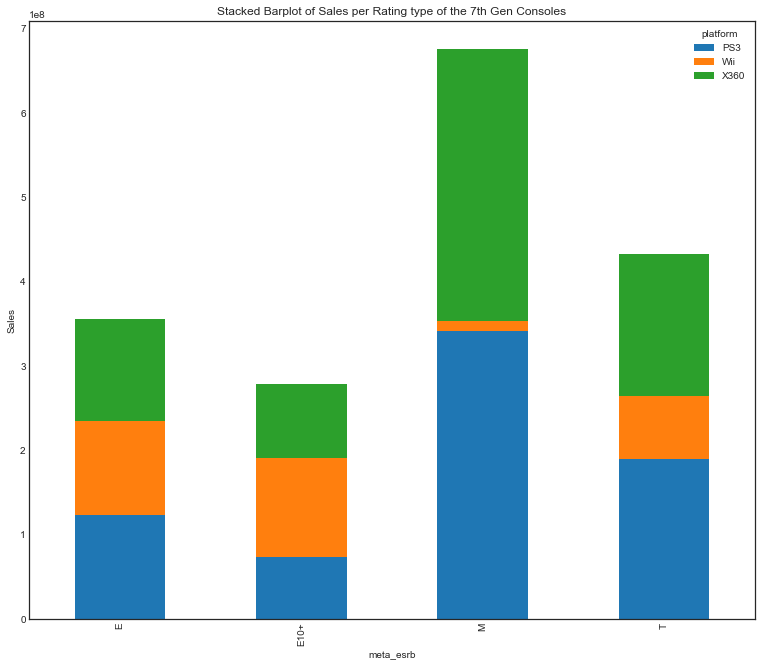

meta_esrb  platform
E          PS3         122680000.0
           Wii         111080000.0
           X360        121510000.0
E10+       PS3          72960000.0
           Wii         117810000.0
           X360         87170000.0
M          PS3         341180000.0
           Wii          11810000.0
           X360        322110000.0
T          PS3         189690000.0
           Wii          74650000.0
           X360        168090000.0
Name: global_sales, dtype: float64

In [16]:
ratingSales = video7th.groupby(['meta_esrb','platform']).global_sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,
                           grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')
plt.show()
ratingSales

### First Impressions : Well not much surprise here as we know that the Wii primarily catered to family-oriented fun and therefore it made the largest sales at Rating E for Everyone while it sold negligible M for Mature games. On the other hand, the PS3 and XB360 sold the most M-rated games, something also pretty obvious from both their plethora of shooters, sandbox games and hacking/slashing games. Heck Yeahhhhh!!!

## **SALES BY GENRE**
### Finally, let's drill down into the data even further and look at the sales made by the 3 consoles and look at what kind of Genre games defined each console and what differentiated one console from the other. To do, I will aggregate the data via a "groupby" call on the Genre feature and Platform. The resultant plot is as follows:

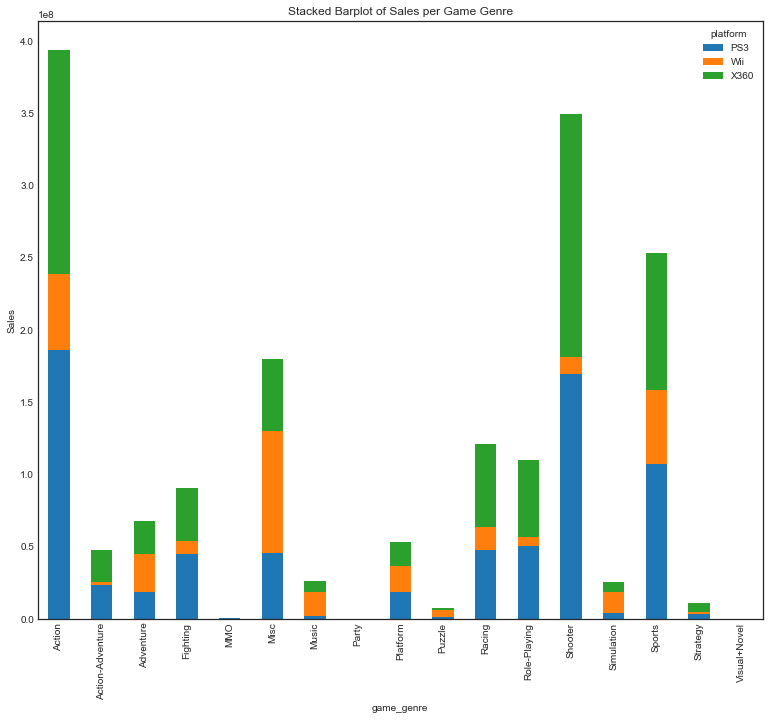

game_genre        platform
Action            PS3         186240000.0
                  Wii          52420000.0
                  X360        155480000.0
Action-Adventure  PS3          23730000.0
                  Wii           2190000.0
                  X360         22100000.0
Adventure         PS3          18630000.0
                  Wii          26250000.0
                  X360         23060000.0
Fighting          PS3          45280000.0
                  Wii           8960000.0
                  X360         36800000.0
MMO               PS3            550000.0
Misc              PS3          45740000.0
                  Wii          84270000.0
                  X360         49820000.0
Music             PS3           2190000.0
                  Wii          16500000.0
                  X360          7750000.0
Party             PS3             40000.0
Platform          PS3          18820000.0
                  Wii          18140000.0
                  X360         16340000.0
Puzzle 

In [17]:
genreSales = video7th.groupby(['game_genre','platform']).global_sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True, 
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')
plt.show()
genreSales

### First Impressions : It seems that for both the PS3 and XB360, their 2 main genres were Action and Shooter games which as we know was the case as they appeal more to the hardcore, action-oriented gamer. The Wii on the other hand, focused on the genre of Sports, Platformers as well as some other Misc games.

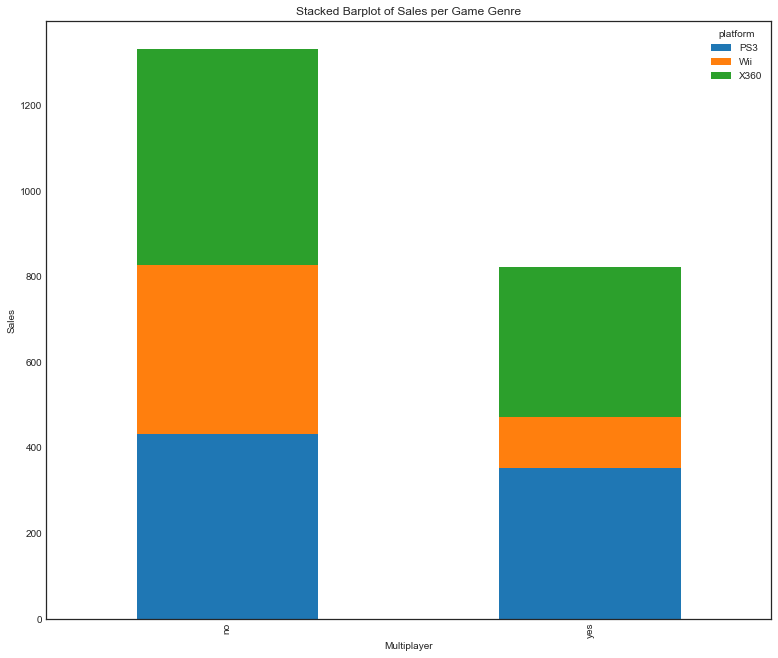

meta_multiplayer  platform
no                PS3         432
                  Wii         395
                  X360        503
yes               PS3         353
                  Wii         119
                  X360        350
Name: meta_multiplayer, dtype: int64

In [18]:
multiSales = video7th.groupby(['meta_multiplayer','platform']).meta_multiplayer.count()
multiSales.unstack().plot(kind='bar',stacked=True, 
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')
plt.xlabel('Multiplayer')
plt.show()
multiSales

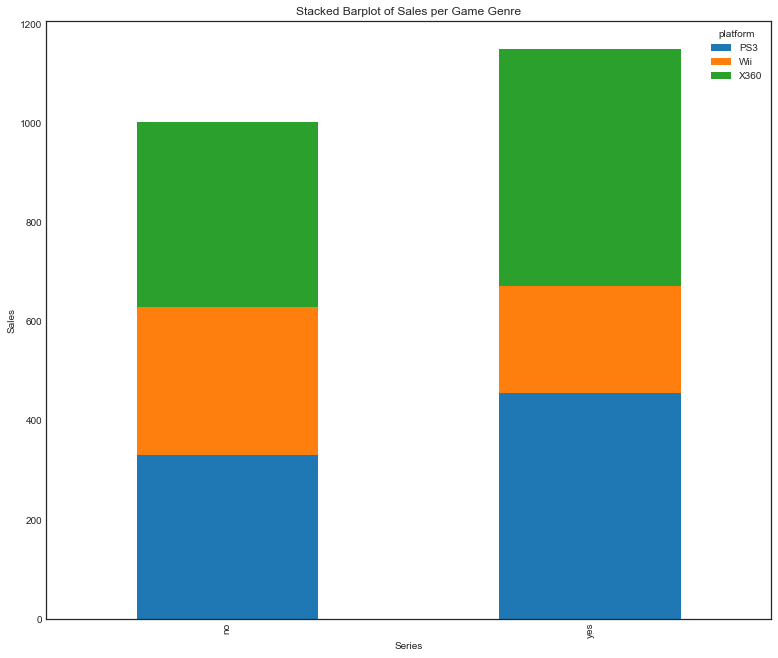

is_series  platform
no         PS3         330
           Wii         298
           X360        375
yes        PS3         455
           Wii         216
           X360        478
Name: is_series, dtype: int64

In [19]:
seriesSales = video7th.groupby(['is_series','platform']).is_series.count()
seriesSales.unstack().plot(kind='bar',stacked=True, 
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')
plt.xlabel('Series')
plt.show()
seriesSales

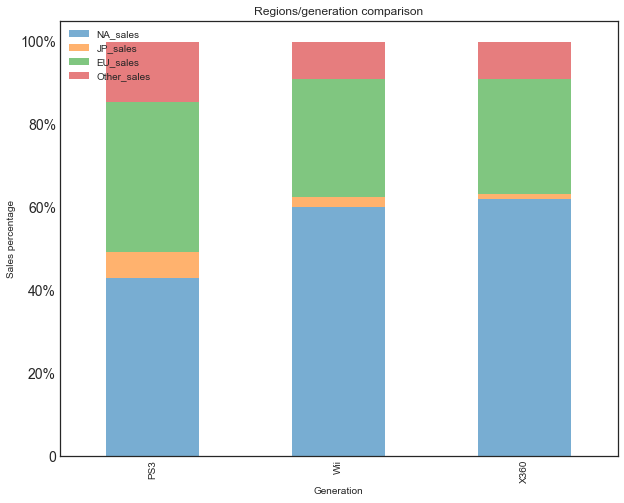

In [20]:
df2=video7th[['na_sales','eu_sales','jp_sales','other_sales','platform']]

df2=df2.groupby(df2['platform']).sum()
df2['NA_sales']= df2['na_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['JP_sales']=df2['jp_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['EU_sales']=df2['eu_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['Other_sales']=df2['other_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2=df2.drop(['na_sales','jp_sales','eu_sales','other_sales'],axis=1)
f=df2.plot.bar(stacked=True, alpha=0.6,title='Regions/generation comparison',figsize=(10,8))
f.set_yticklabels(labels=['0','20%','40%','60%','80%','100%'],size=14)
var=f.set(xlabel='Generation',ylabel= 'Sales percentage'  )


## **TOTAL SALES AND TOTAL USERS**
### Finally let us look at pie chart visualisations of the total number of Global Sales and total number of users attributed to each of the 3 consoles. The way I am going to present this is to simply add up the Global sales and number of users value for all games. Therefore as a caveat, take the numbers and visualisation with a pinch of salt as this output will be dependent on whether the original dataset was fully inclusive in the first instance.

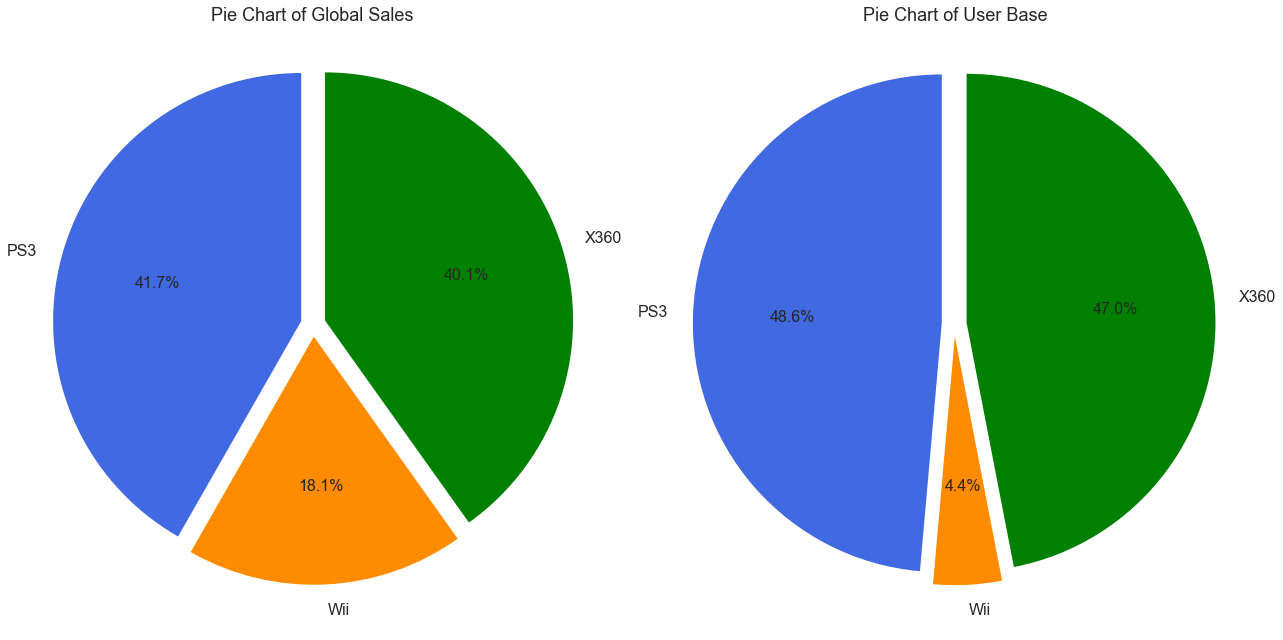

In [44]:
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['royalblue','darkorange','green']
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.pie(
   video7th.groupby('platform').global_sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('platform').global_sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    textprops={'fontsize': 16}
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales',fontsize=18)
plt.subplot(122)
plt.pie(
   video7th.groupby('platform').meta_user_count.sum(),
    labels=video7th.groupby('platform').meta_user_count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 16}
    )
plt.axis('equal')
plt.title('Pie Chart of User Base',fontsize=18)
plt.tight_layout()
plt.show()

## Concluding Remarks

### From the pie charts above as well as the earlier barplots, it seems that both the PS3 and the XB360 were very evenly matched, with the XB360 having the slight edge in global sales. What is obvious is that from these metrics alone, the showing from the Wii could not compete against its other 2 competitors.

## **WINNER : PS3 & XB360 (Two-way Tie)**

## **8th GENERATION CONSOLE WAR**
## Tale of the tape : PS4 vs XBOXONE vs WiiU
### Onto our second event of the evening and as per the earlier sections, I'll provide some visualisations and summary statistics on the 8th Gen Console wars. First up, I will create a dataframe ("video8th") to only contain data pertaining to these 3 particular consoles:

In [23]:
video8th = df[(df['platform'] == 'WiiU') | (df['platform'] == 'PS4') | (df['platform'] == 'XOne')]
video8th.shape

(1012, 26)

In [50]:
video8th=video8th.set_index('name')
video8th.to_csv('../data/analysis/platform8.csv')

## **GLOBAL SALES OVER THE YEARS**
### Following our approach with the 7th Gen data, let's first have a high-level grasp of the sales performance of these 8th Gen games over the years. Therefore I shall once again aggregate the data via a "groupby" call on the Year_of_Release and "Platform" and then sum the Global_Sales with stacked barplots for visualisation.

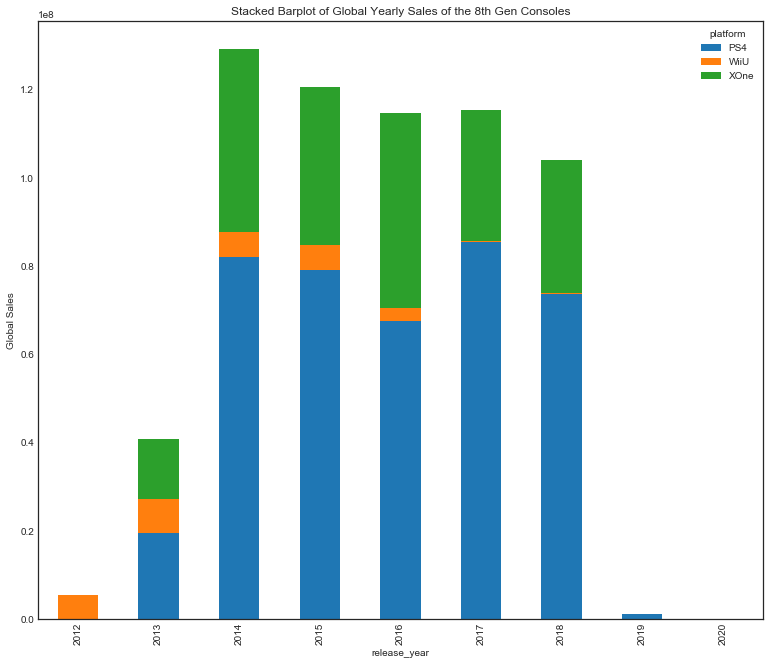

release_year  platform
2012          WiiU         5500000.0
2013          PS4         19450000.0
              WiiU         7630000.0
              XOne        13670000.0
2014          PS4         82040000.0
              WiiU         5600000.0
              XOne        41490000.0
2015          PS4         79210000.0
              WiiU         5560000.0
              XOne        35790000.0
2016          PS4         67490000.0
              WiiU         2950000.0
              XOne        44230000.0
2017          PS4         85540000.0
              WiiU          220000.0
              XOne        29700000.0
2018          PS4         73780000.0
              WiiU          100000.0
              XOne        30190000.0
2019          PS4          1040000.0
2020          PS4            10000.0
Name: global_sales, dtype: float64

In [24]:
yearlySales = video8th.groupby(['release_year','platform']).global_sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True,  
                           grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 8th Gen Consoles')
plt.ylabel('Global Sales')
plt.show()
yearlySales

### First Impression : It is obvious just by one look that the PS4 global sales exceed those of BOTH the WiiU and XOne combined. This is a very marked deviation from its predecessor's performance in the 7th Gen when the PS3 and XB360 where neck to neck in sales performance over the years. So how can be explain this dominance this time round? Also, the WiiU is the only console with any sales in 2012 because the PS4 and XBONE were only released in 2013.

,Releases,Global Sales
platform,,
PS4,567,408560000.0
WiiU,90,27560000.0
XOne,355,195070000.0


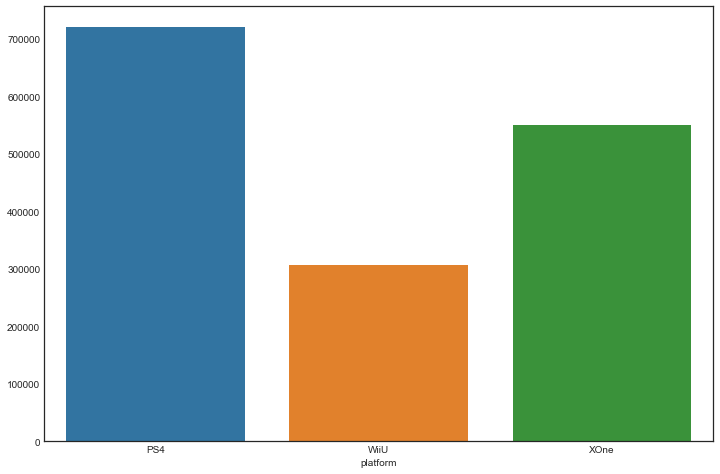

In [55]:
data = video8th.groupby('platform').count()['release_date']
data = pd.DataFrame(data)
data.columns = ['Releases']
data2 = video8th.groupby(['platform']).sum()['global_sales']
data2 = pd.DataFrame(data2.sort_values(ascending=False))

data2.columns = ['Global Sales']
final_data = pd.merge(left=data, right=data2, how='left', left_on='platform', right_on='platform')
plt.figure(figsize=(12,8))
y= final_data['Global Sales']/final_data['Releases']
plat=final_data.index
ax = sns.barplot(y = y , x = plat, data=final_data)
final_data

On Average, PS4 games get more sales per releases. This may suggest that PS4 users are more inclined to buy games.

## **SALES AGGREGATED BY VIDEO GAME RATINGS**
### Well let's boil our analysis down even further to see if we can investigate this PS4 dominance. Let's look at what kind of audiences (hence looking at the Ratings) these consoles catered their games to

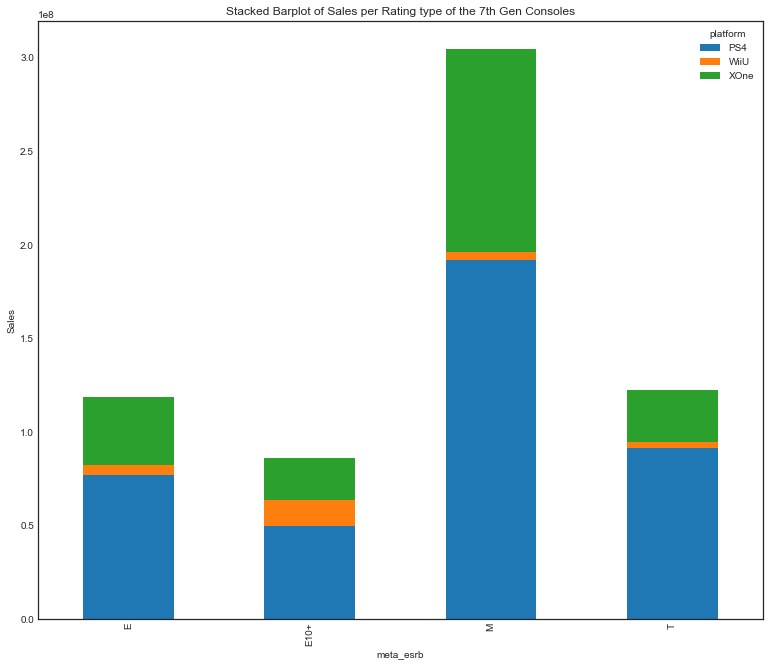

meta_esrb  platform
E          PS4          76720000.0
           WiiU          5410000.0
           XOne         36450000.0
E10+       PS4          49370000.0
           WiiU         14210000.0
           XOne         22200000.0
M          PS4         191460000.0
           WiiU          4310000.0
           XOne        108640000.0
T          PS4          91010000.0
           WiiU          3630000.0
           XOne         27780000.0
Name: global_sales, dtype: float64

In [25]:
ratingSales = video8th.groupby(['meta_esrb','platform']).global_sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,
                           grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')
plt.show()
ratingSales

### First Impression : An Interesting result this time round. Unlike the 7th Gen where there was a clear demarcation in the sense that the PS3 and XB360 produced games primarily for the M for Mature audience while the Wii was for the E for Everyone audience, it seems that the PS4 has decided to cater ( or has somehow appealed more) to both the M and E audience. This could explain their earlier dominance in global sales as they are now taking up both the hardcore gaming audience as well as the casual, family-friendly audience.

## **SALES BY GENRE**
### Finally, let's look at the breakdown by Genre via an aggregation the data with a "groupby" call on the Genre feature and Platform. The resultant plot is as follows:

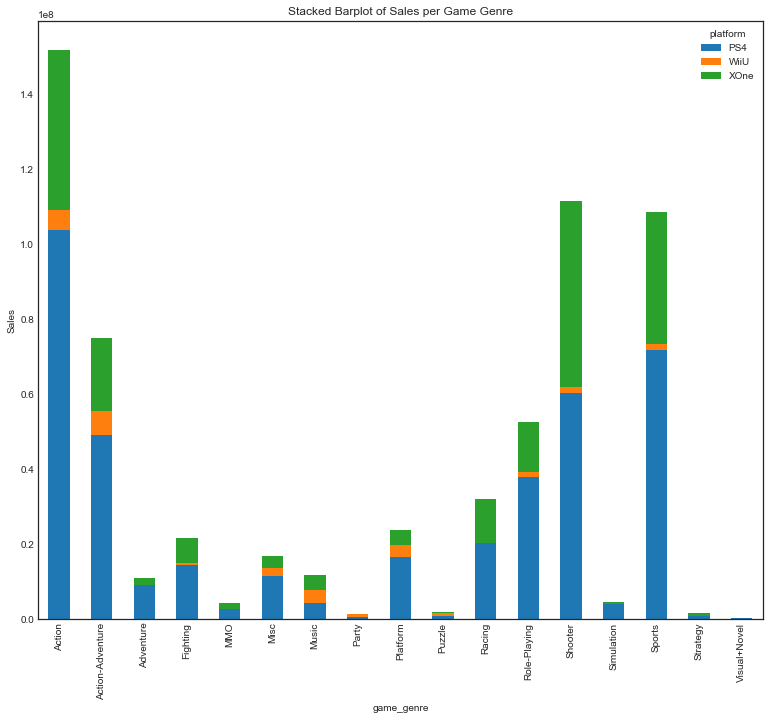

game_genre        platform
Action            PS4         103790000.0
                  WiiU          5550000.0
                  XOne         42680000.0
Action-Adventure  PS4          49230000.0
                  WiiU          6260000.0
                  XOne         19480000.0
Adventure         PS4           9030000.0
                  WiiU           210000.0
                  XOne          1800000.0
Fighting          PS4          14480000.0
                  WiiU           390000.0
                  XOne          6920000.0
MMO               PS4           2730000.0
                  XOne          1630000.0
Misc              PS4          11510000.0
                  WiiU          2210000.0
                  XOne          3140000.0
Music             PS4           4330000.0
                  WiiU          3340000.0
                  XOne          4000000.0
Party             PS4            650000.0
                  WiiU           820000.0
Platform          PS4          16500000.0
       

In [26]:
genreSales = video8th.groupby(['game_genre','platform']).global_sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True, 
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')
plt.show()
genreSales

### First Impression : Again, this plot is very telling in the sense that the PS4 is clearly trying to gain an inroad into more genres than its predecessor, the PS3. Just from a quick visual glance, one can observe that the PS4 already has the majority of sales in 7 out of 12 of the genres ( 4 out of 12 for the PS3).

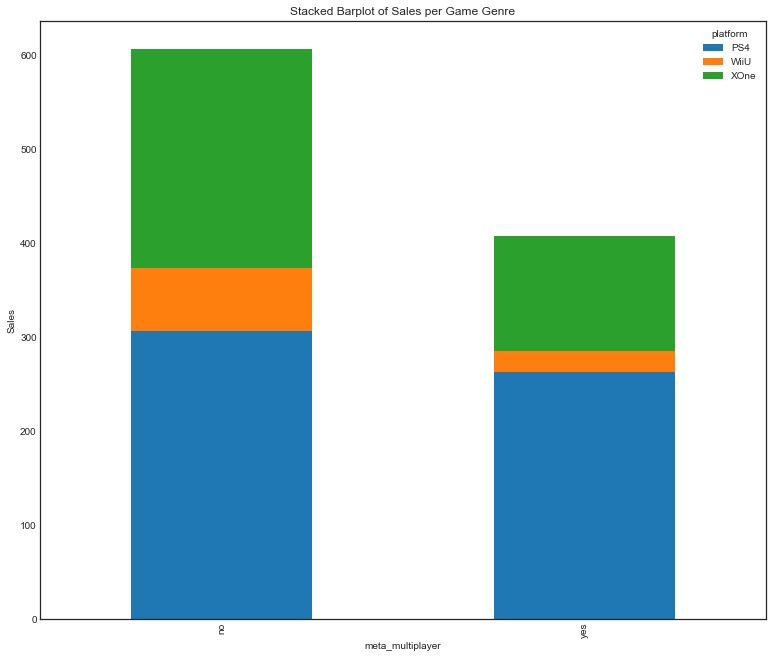

meta_multiplayer  platform
no                PS4         306
                  WiiU         67
                  XOne        233
yes               PS4         262
                  WiiU         23
                  XOne        122
Name: meta_multiplayer, dtype: int64

In [19]:
multiSales = video8th.groupby(['meta_multiplayer','platform']).meta_multiplayer.count()
multiSales.unstack().plot(kind='bar',stacked=True, 
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')
plt.show()
multiSales

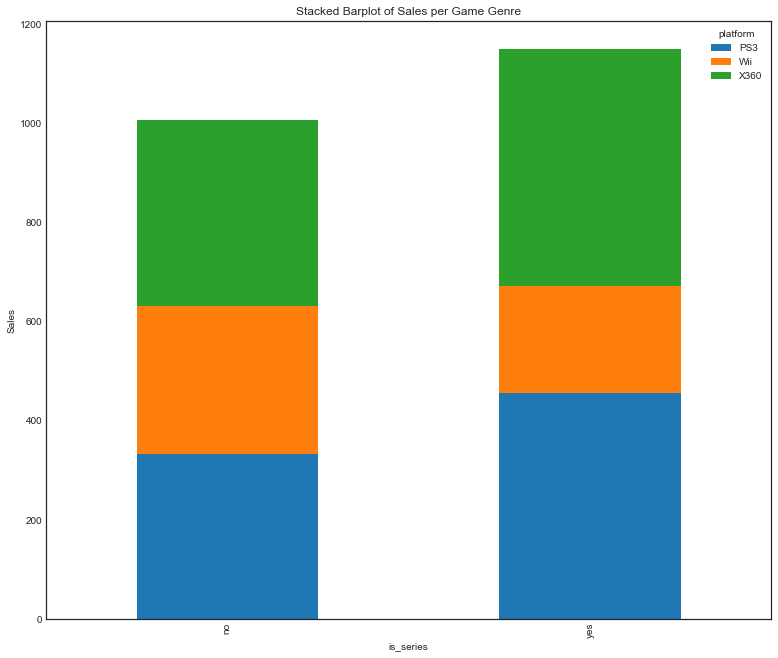

is_series  platform
no         PS3         332
           Wii         298
           X360        376
yes        PS3         455
           Wii         216
           X360        478
Name: is_series, dtype: int64

In [20]:
seriesSales = video7th.groupby(['is_series','platform']).is_series.count()
seriesSales.unstack().plot(kind='bar',stacked=True, 
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')
plt.show()
seriesSales

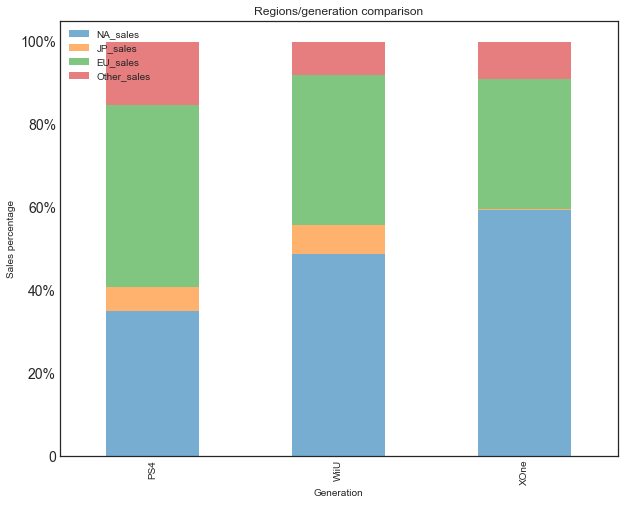

In [21]:
df2=video8th[['na_sales','eu_sales','jp_sales','other_sales','platform']]

df2=df2.groupby(df2['platform']).sum()
df2['NA_sales']= df2['na_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['JP_sales']=df2['jp_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['EU_sales']=df2['eu_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2['Other_sales']=df2['other_sales']/(df2['na_sales'] + df2['jp_sales'] + df2['eu_sales'] + df2['other_sales'])
df2=df2.drop(['na_sales','jp_sales','eu_sales','other_sales'],axis=1)
f=df2.plot.bar(stacked=True, alpha=0.6,title='Regions/generation comparison',figsize=(10,8))
f.set_yticklabels(labels=['0','20%','40%','60%','80%','100%'],size=14)
var=f.set(xlabel='Generation',ylabel= 'Sales percentage'  )

### An extremely small portion of xbox one sales are in japan. This may be because the Japanese people like to promote Japanese companies, so Nintendo and Sony have both excelled there because they are both Japanese companies.

## **TOTAL SALES AND TOTAL USERS**

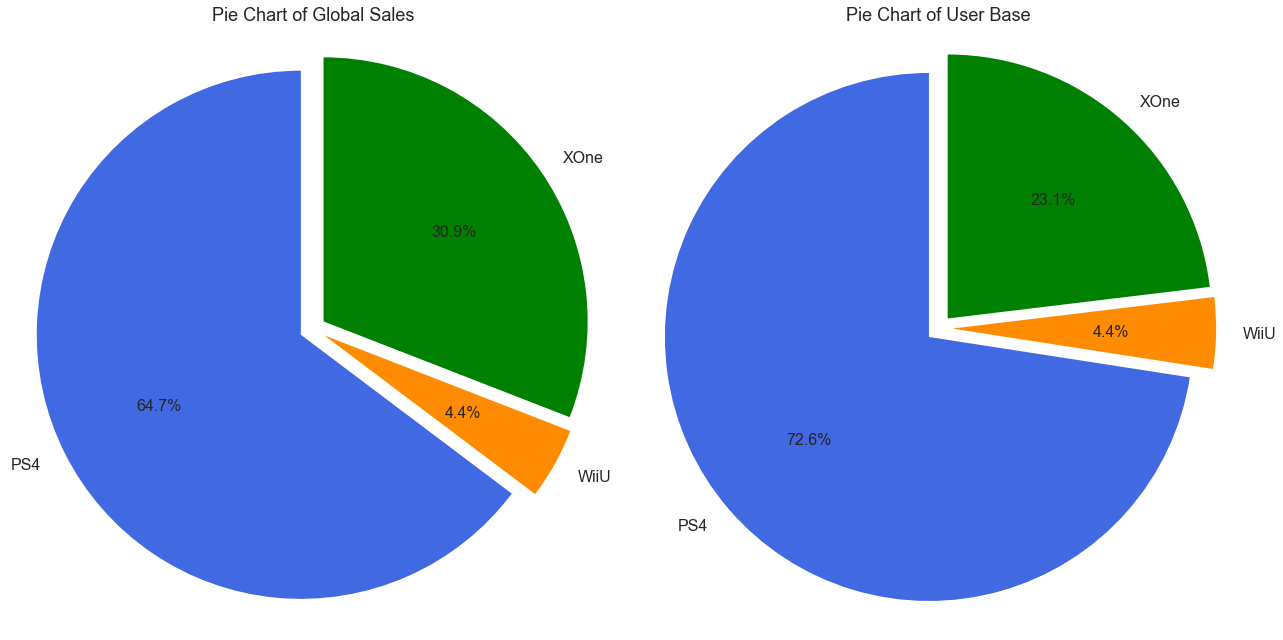

In [45]:
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['royalblue','darkorange','green']
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.pie(
   video8th.groupby('platform').global_sales.sum(),
    # with the labels being platform
    labels=video8th.groupby('platform').global_sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    textprops={'fontsize': 16}
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales',fontsize=18)
plt.subplot(122)
plt.pie(
   video8th.groupby('platform').meta_user_count.sum(),
    labels=video8th.groupby('platform').meta_user_count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 16}
    )
plt.axis('equal')
plt.title('Pie Chart of User Base',fontsize=18)
plt.tight_layout()
plt.show()

## Concluding Remarks

### Unlike the 7th Gen consoles, we have a very clear leader for the 8th Gen consoles, and that would be the PS4, far outstripping the XBOXONE and the WiiU. Although this console war is far from over, it is undoubted that the PS4 has a very big headstart.

## **WINNER : PS4 (so far)**